In [1]:
from src.config import Config
config = Config()

### Generate Training Data and Visualize

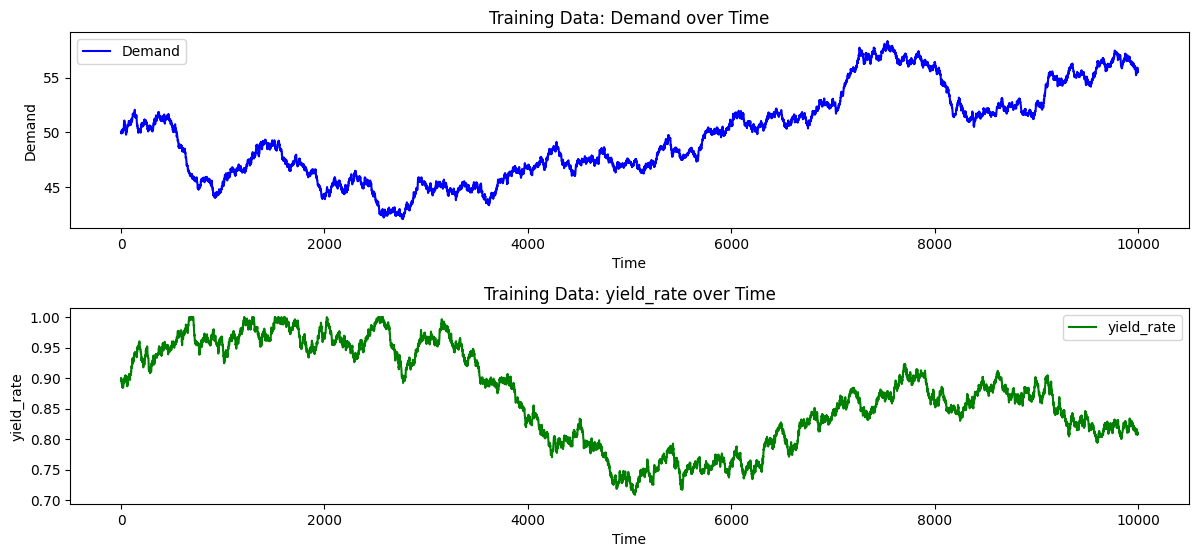

In [2]:
import matplotlib.pyplot as plt 
from src.data_simulator import generate_data

train_data = generate_data(n_periods=config.training_period, mode="train", seed=42)
plt.figure(figsize=(12, 8))

# Plot Demand
plt.subplot(3, 1, 1)
plt.plot(train_data['time'], train_data['demand'], label='Demand', color='blue')
plt.title('Training Data: Demand over Time')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()

# Plot Lead Time
plt.subplot(3, 1, 2)
plt.plot(train_data['time'], train_data['yield_rate'], label='yield_rate', color='green')
plt.title('Training Data: yield_rate over Time')
plt.xlabel('Time')
plt.ylabel('yield_rate')
plt.legend()

plt.tight_layout()
plt.show()

### Train the RL agent using PPO

In [3]:
from src.reinforcement_learning import train_ppo_model
train_ppo_model(train_data)

Output()

### Generate Test Data and Visualize

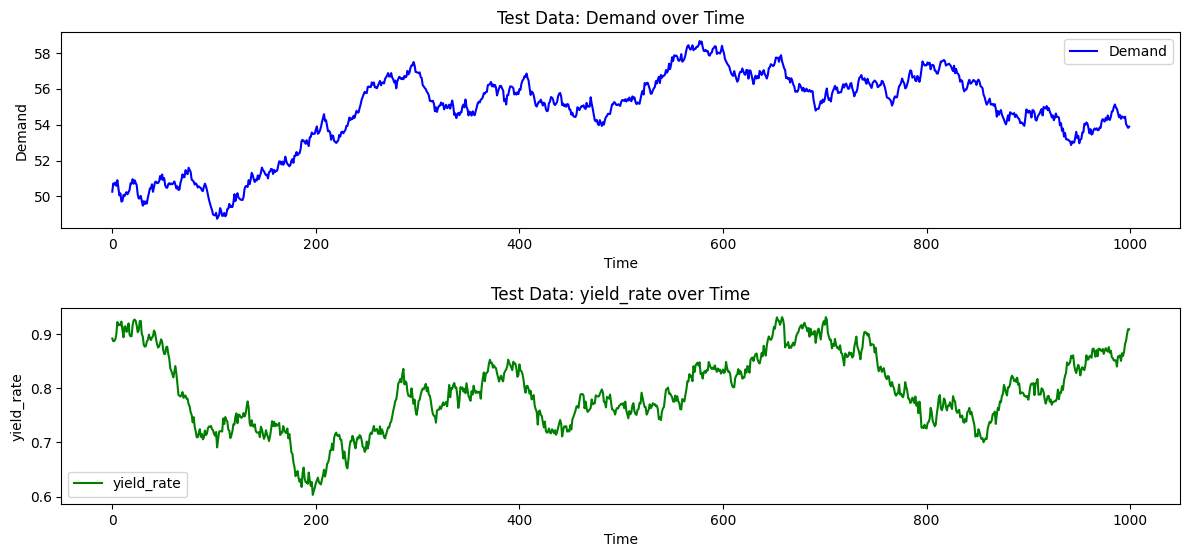

In [4]:
# Generate test data and evaluate performance
test_data = generate_data(n_periods=config.test_period, mode="test", seed=24)

plt.figure(figsize=(12, 8))

# Plot Demand
plt.subplot(3, 1, 1)
plt.plot(test_data['time'], test_data['demand'], label='Demand', color='blue')
plt.title('Test Data: Demand over Time')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()

# Plot Lead Time
plt.subplot(3, 1, 2)
plt.plot(test_data['time'], test_data['yield_rate'], label='yield_rate', color='green')
plt.title('Test Data: yield_rate over Time')
plt.xlabel('Time')
plt.ylabel('yield_rate')
plt.legend()

plt.tight_layout()
plt.show()

### Load the trained RL model and Compare Performances with Pure RL and Pure RO

In [5]:
from src.performance_evaluation import PerformanceEvaluator
from src.robust_optimization import robust_order_quantity
from src.inventory_env import InventoryEnv
from stable_baselines3 import PPO

# Load the trained RL model
rl_model = PPO.load(config.model_path)

evaluator = PerformanceEvaluator(
    test_data=test_data,
    env_class=InventoryEnv,
    robust_optimizer=robust_order_quantity,
    rl_model=rl_model,
)

performance_table = evaluator.evaluate_all_methods()
print("\nPerformance Evaluation:")
print(performance_table)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-25
Entropy: 0.9999935711698599
Entropy: 0.9999947076967872
Entropy: 0.9999965674681228
Entropy: 0.9999965674681228
Entropy: 0.9999963608268634
Entropy: 0.9999964641474931
Entropy: 0.9999955342618253
Entropy: 0.9999951209793062
Entropy: 0.9999947076967872
Entropy: 0.9999947076967872
Entropy: 0.9999948110174169
Entropy: 0.9999950176586765
Entropy: 0.999995224299936
Entropy: 0.999995224299936
Entropy: 0.9999950176586765
Entropy: 0.9999947076967872
Entropy: 0.9999947076967872
Entropy: 0.9999950176586765
Entropy: 0.9999951209793062
Entropy: 0.9999951209793062
Entropy: 0.9999950176586765
Entropy: 0.9999947076967872
Entropy: 0.9999949143380468
Entropy: 0.9999950176586765
Entropy: 0.9999951209793062
Entropy: 0.9999950176586765
Entropy: 0.9999949143380468
Entropy: 0.9999948110174169
Entropy: 0.9999949143380468
Entropy: 0.9999948110174169
Entropy: 0.9999949143380468
Entropy: 0.9999949143380468
Entropy: 0.9999